# Demonstration of Nyquist-Shannon Sampling Theorem

The Nyquist-Shannon theorem states that to accurately reconstruct a signal, the sampling rate must be more than twice the signal's highest frequency (2 times the highest fequency is the nyquist-fequency). If sampling is too slow, **aliasing** occurs—high-frequency components appear as lower frequencies, distorting the original signal systematically. The Nyquist rate is a _minimum_ threshold—it tells us the lowest rate required to capture a signal’s fundamental shape without aliasing. Often, it is better to oversample signals a bit. Downsampling is always possible afterwards. If you however undersampled your data, tears might follow.

__Explore sampling in this interactive applet :)__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from ipywidgets import interact, FloatSlider

In [2]:
# Just run this code and explore the interactive widget below.
def plot_sampling_effect(frequency=5, sampling_rate=20):
    t_continuous = np.linspace(0, 1, 1000)  
    t_sampled = np.arange(0, 1, 1 / sampling_rate)  
    signal_continuous = np.cos(2 * np.pi * frequency * t_continuous) # also try sin() here, then sampe at nyquist-freq
    signal_sampled = np.cos(2 * np.pi * frequency * t_sampled)       # also try sin() here, then sampe at nyquist-freq

    interp_func = interp1d(t_sampled, signal_sampled, kind='linear', fill_value="extrapolate")
    signal_reconstructed = interp_func(t_continuous)

    plt.figure(figsize=(10, 6))
    plt.plot(t_continuous, signal_continuous, label="Continuous Signal", lw = 2, color="blue", alpha=0.5)
    plt.stem(t_sampled, signal_sampled, label="Sampled Signal", linefmt="r-", markerfmt="ro", basefmt=" ")
    plt.plot(t_continuous, signal_reconstructed, label="Interpolated Signal", color="r", linestyle="--", alpha=0.5)
    plt.axhline(0, c = "k", alpha = 0.3)
    
    plt.title(f"Signal Frequency: {frequency:.0f} Hz, Sampling Rate: {sampling_rate:.0f} Hz")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.tight_layout()
    plt.gca().set_facecolor("whitesmoke")
    plt.grid(True)
    plt.ylim(-1.5, 1.5)
    plt.xlim(0,1)
    plt.show()

# Interactive sliders for frequency and sampling rate
interact(plot_sampling_effect,
         frequency=FloatSlider(value=5, min=1, max=30, step=1, description="Signal Frequency (Hz)"),
         sampling_rate=FloatSlider(value=20, min=2, max=60, step=1, description="Sampling Rate (Hz)"));


# Try for instance the following settings:
#
# Signal 5 samples/s,  Sampling at 4 samples/s
# Signal 10 samples/s, Sampling at 40 samples/s
# Signal 8 samples/s,  Sampling at 20 samples/s

# Extra Stuff:
# If you wanna see something funny, change in the above code cos() to sin() and sample exactly at(!) the Nyquist-Frequency!

interactive(children=(FloatSlider(value=5.0, description='Signal Frequency (Hz)', max=30.0, min=1.0, step=1.0)…

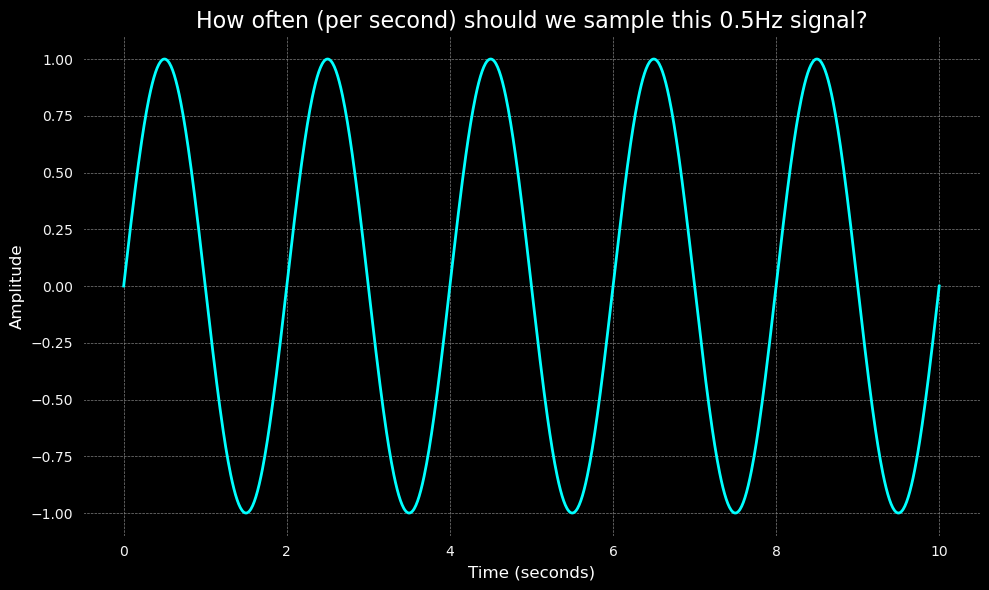

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time array from 0 to 2π
# Define the time array for a 1 Hz signal over 12 seconds
t = np.linspace(0, 10, 1000)  # 12 seconds

# Create a 1 Hz sinusoidal signal
y = np.sin(2 * np.pi * 0.5 * t)  # 1 Hz frequency


# Create the plot
plt.figure(figsize=(10, 6), facecolor='black')
plt.plot(t, y, color='cyan', linewidth=2)  # Sinusoidal plot
plt.title('How often (per second) should we sample this 0.5Hz signal?', color='white', fontsize=16)
plt.xlabel('Time (seconds)', color='white', fontsize=12)
plt.ylabel('Amplitude', color='white', fontsize=12)

# Customize grid and background
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('black') #('xkcd:charcoal grey')  # Set the background color to black
plt.xticks(color='whitesmoke')
plt.yticks(color='whitesmoke')

# Show the plot
plt.tight_layout()
plt.show()
